In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**This notebook has my plots, make sure the files contain a discrimination index before using them**


In [ ]:
# Code to calculate discrimination index
df = pd.read_csv('slr2objcnn.csv')
df['discrimination_index'] = (df['novel_exploration'] - df['familiar_exploration']) / (df['novel_exploration'] + df['familiar_exploration'])
df.to_csv("slr2objcnn.csv")

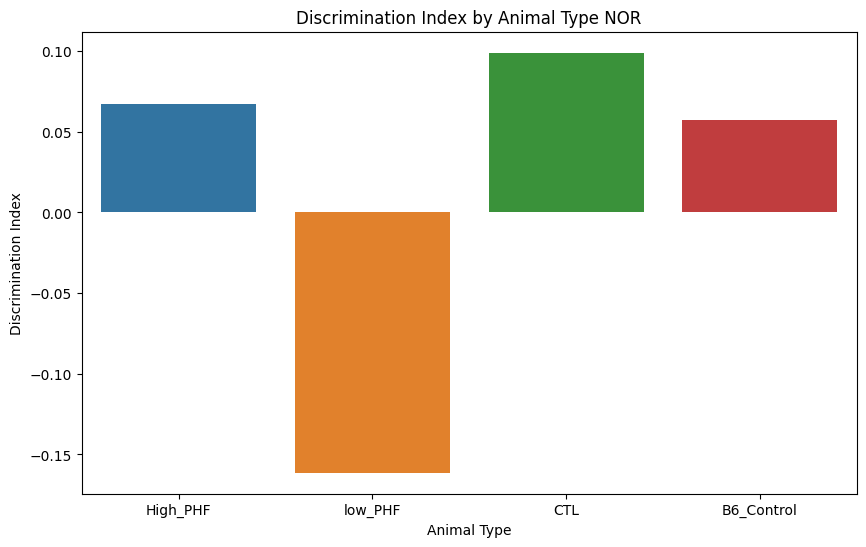

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tkinter import filedialog

df = pd.read_csv('norvertical.csv')

df['animal_type'] = pd.Categorical(df['animal_type'], categories=['High_PHF', 'low_PHF', 'CTL', 'B6_Control'], ordered=True)

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='animal_type', y='discrimination_index', errorbar=None)
plt.title('Discrimination Index by Animal Type NOR')
plt.xlabel('Animal Type')
plt.ylabel('Discrimination Index')
plt.show()



Plot saved as images/noranymaze_plot.png


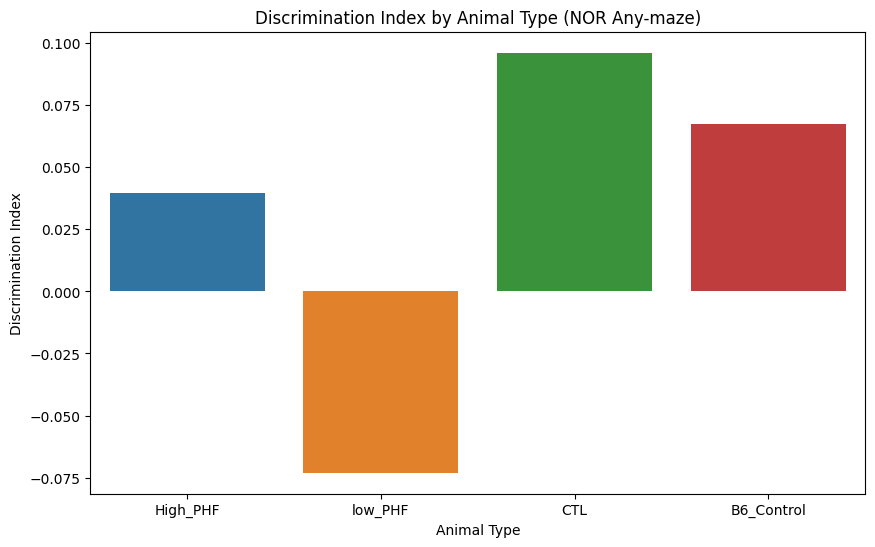

Plot saved as images/NORCNN_plot.png


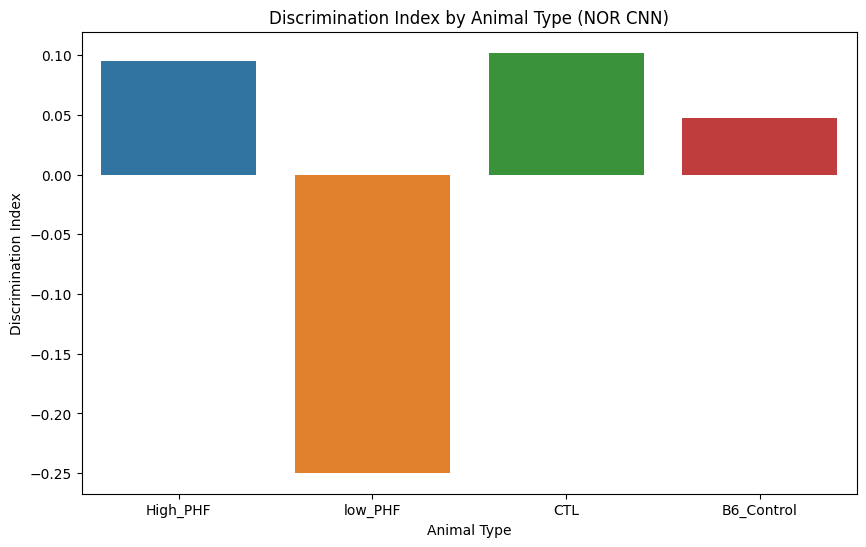

Plot saved as images/NORwithcenters_plot.png


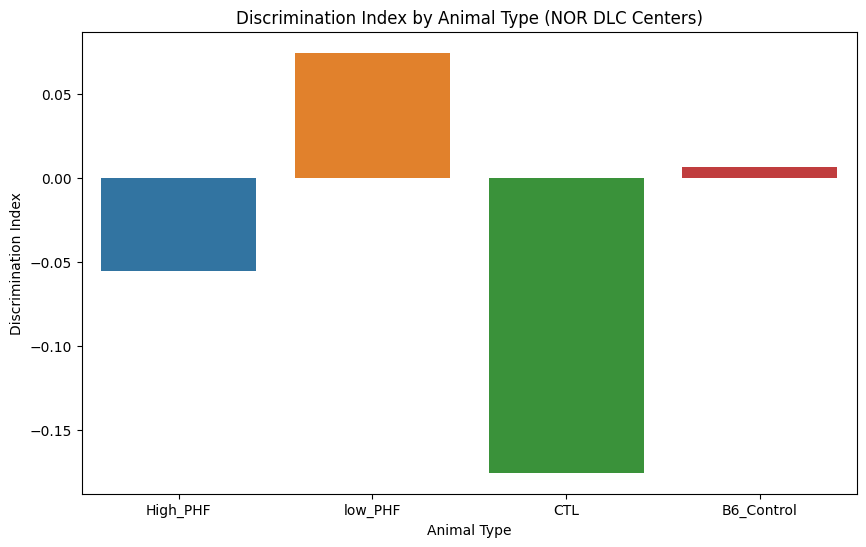

Plot saved as images/NORwithobjects_plot.png


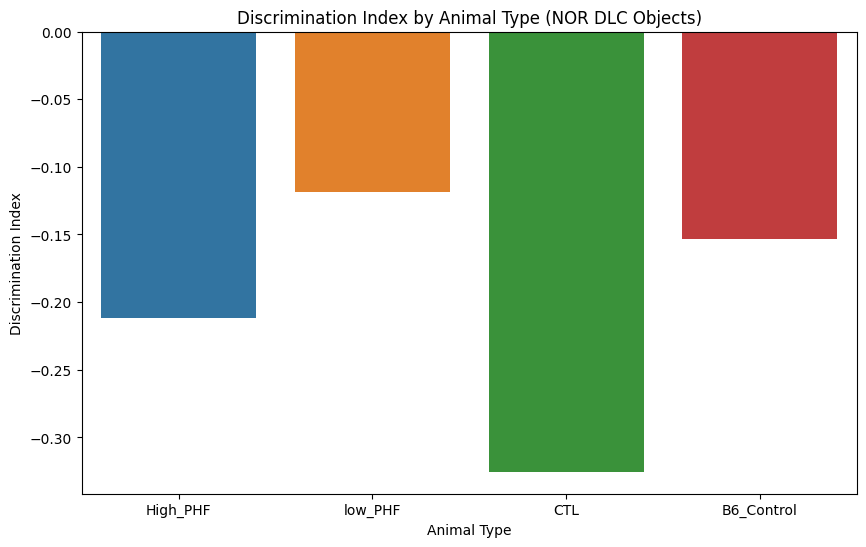

Plot saved as images/slr2objanymaze_plot.png


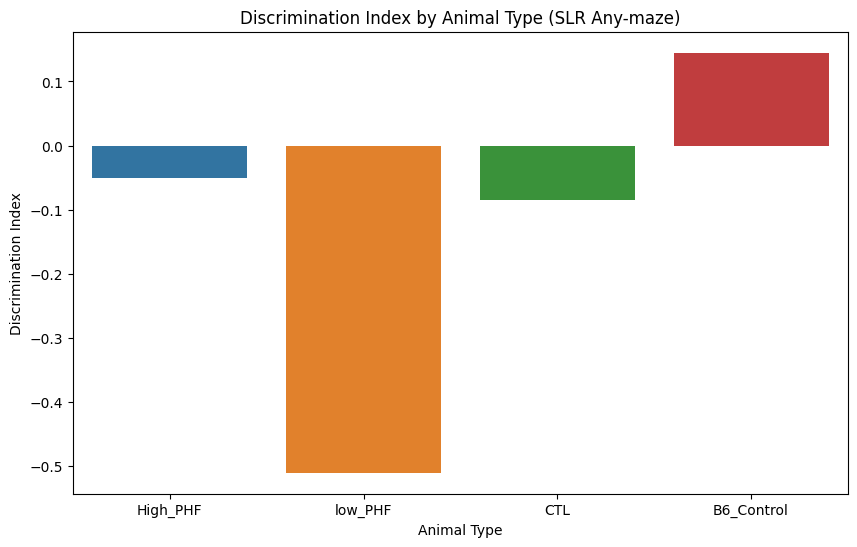

Plot saved as images/slr2objcnn_plot.png


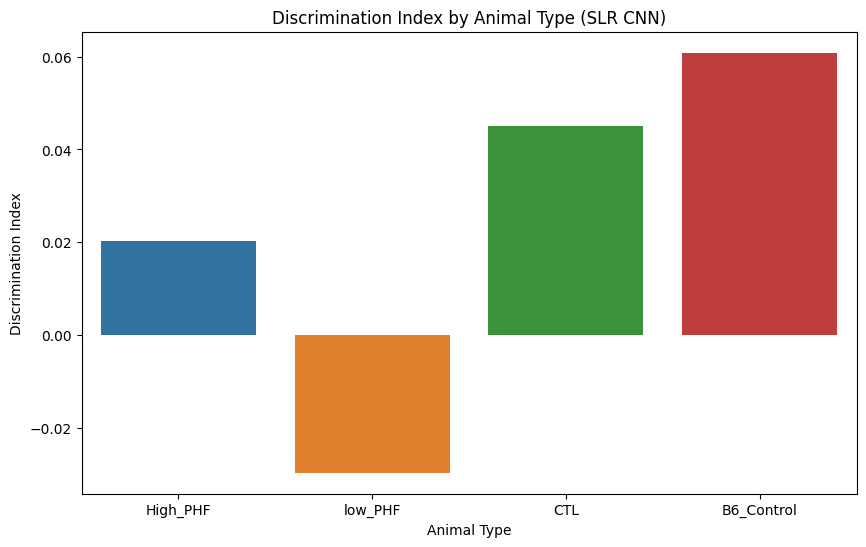

Plot saved as images/SLRwithcenters_plot.png


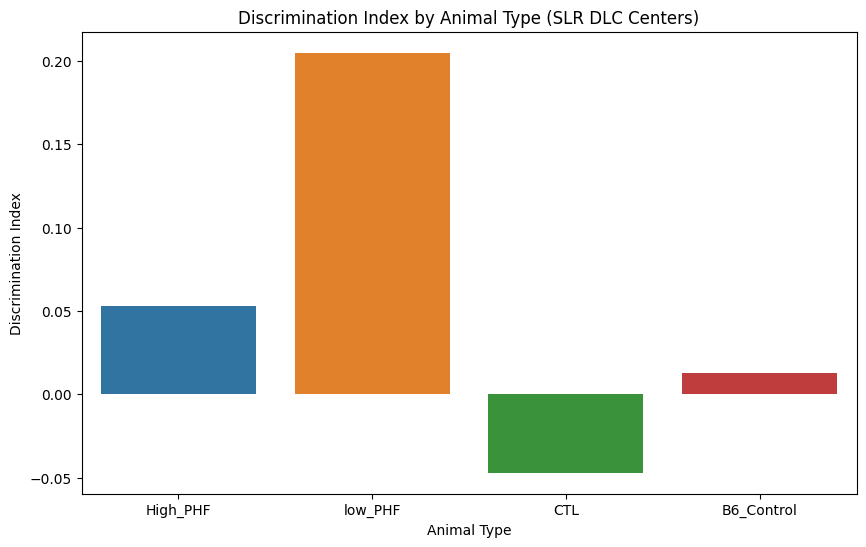

Plot saved as images/SLRwithobjects_plot.png


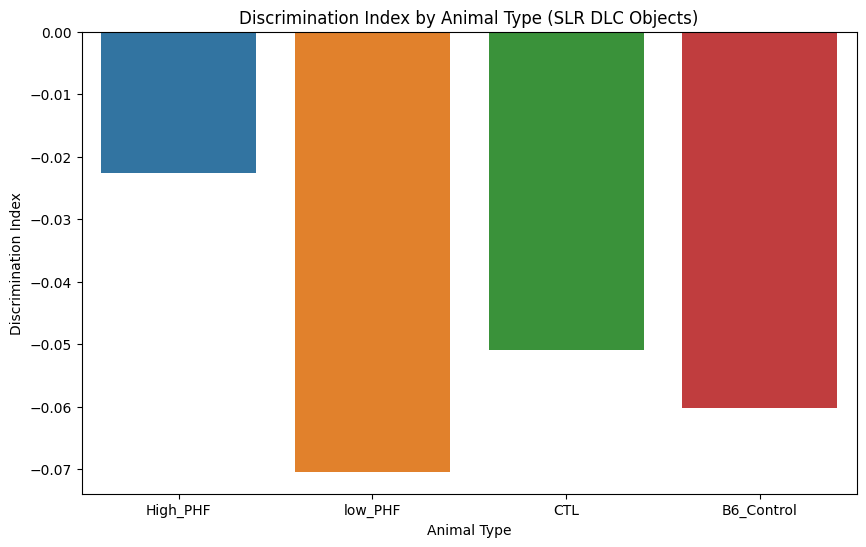

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# List of CSV files
dfs = {'noranymaze.csv':'NOR Any-maze', 'NORCNN.csv':'NOR CNN', 'NORwithcenters.csv':'NOR DLC Centers', 'NORwithobjects.csv': 'NOR DLC Objects', 'slr2objanymaze.csv': 'SLR Any-maze', 'slr2objcnn.csv':'SLR CNN', 'SLRwithcenters.csv':"SLR DLC Centers", 'SLRwithobjects.csv':"SLR DLC Objects"}

# Loop through each CSV file in the list
for file_name in dfs:
    # Read the CSV file
    df = pd.read_csv(file_name)
    
    # Convert the 'discrimination_index' column to numeric, handling errors with coercion
    df['discrimination_index'] = pd.to_numeric(df['discrimination_index'], errors='coerce')
    
    # Define the ordered categories for the 'animal_type' column
    df['animal_type'] = pd.Categorical(df['animal_type'], categories=['High_PHF', 'low_PHF', 'CTL', 'B6_Control'], ordered=True)
    
    # Create the bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df, x='animal_type', y='discrimination_index', errorbar=None)
    plt.title(f'Discrimination Index by Animal Type ({dfs[file_name]})')
    plt.xlabel('Animal Type')
    plt.ylabel('Discrimination Index')
    
    # Save the plot as an image file
    image_filename = 'images/' + file_name.split('.')[0] + '_plot.png'
    plt.savefig(image_filename)
    print(f"Plot saved as {image_filename}")

    # Show the plot
    plt.show()


noranymaze.csv
Plot saved as images/noranymaze_pie.png
NORCNN.csv
Plot saved as images/NORCNN_pie.png
NORwithcenters.csv
Plot saved as images/NORwithcenters_pie.png
NORwithobjects.csv
Plot saved as images/NORwithobjects_pie.png
slr2objanymaze.csv
Plot saved as images/slr2objanymaze_pie.png
slr2objcnn.csv
Plot saved as images/slr2objcnn_pie.png
SLRwithcenters.csv
Plot saved as images/SLRwithcenters_pie.png
SLRwithobjects.csv
Plot saved as images/SLRwithobjects_pie.png


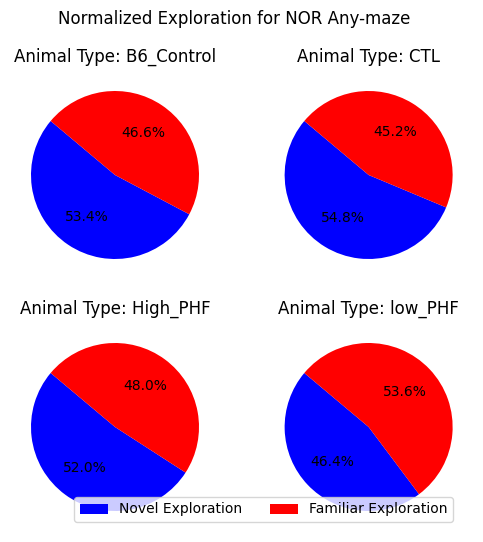

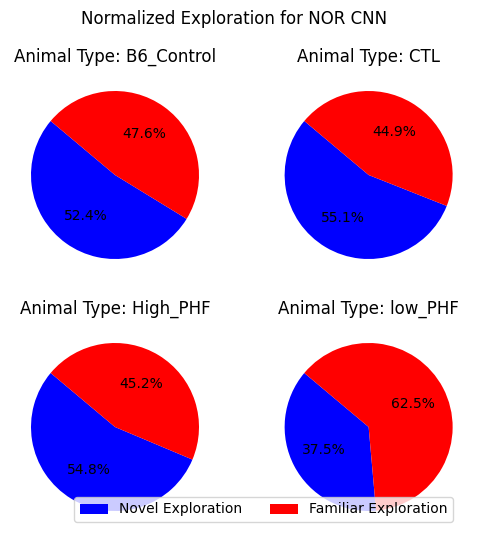

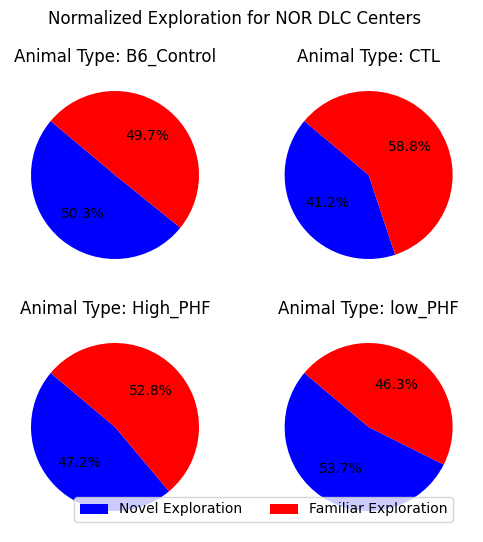

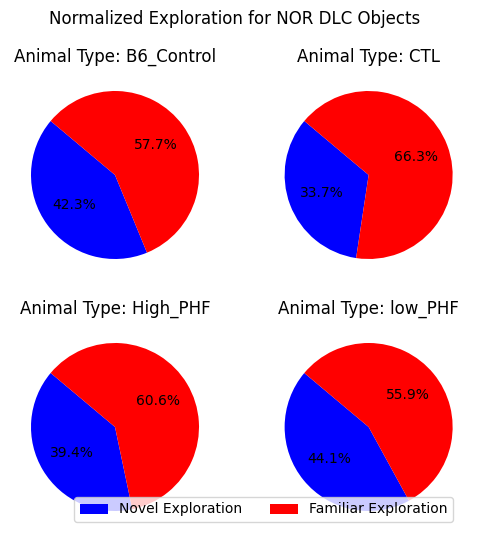

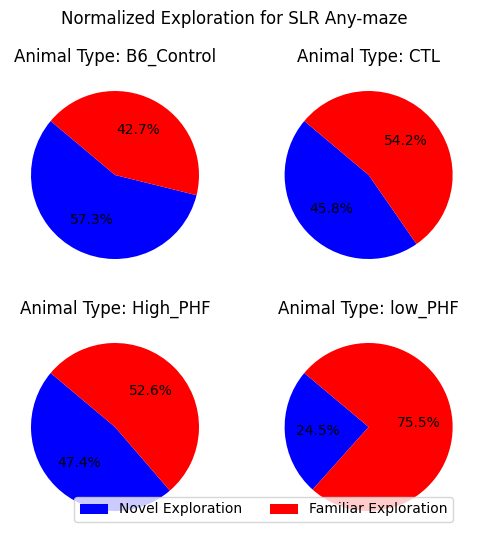

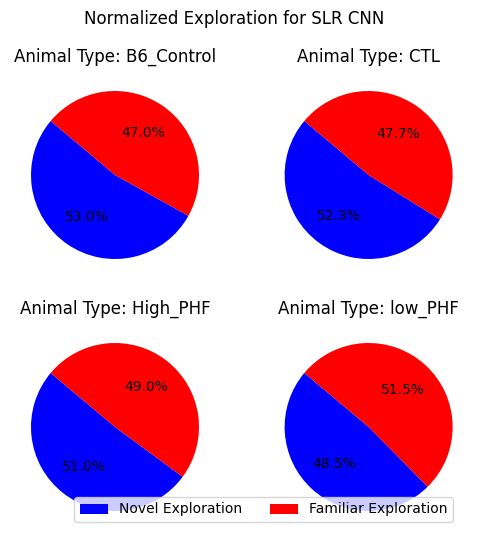

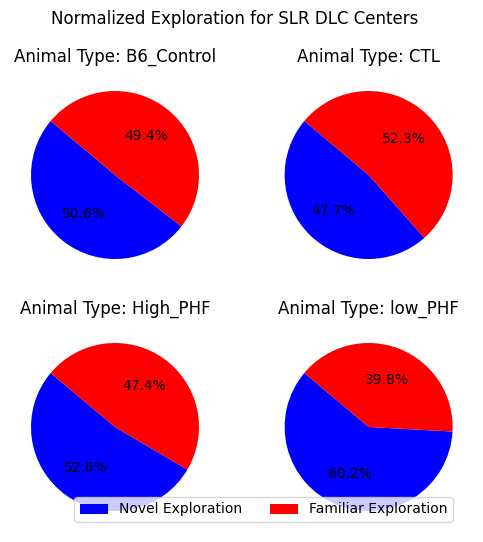

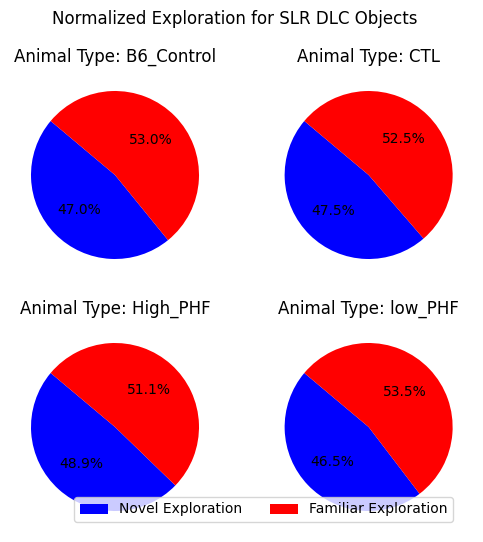

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dictionary of CSV files with descriptive names
dfs = {'noranymaze.csv':'NOR Any-maze', 'NORCNN.csv':'NOR CNN', 'NORwithcenters.csv':'NOR DLC Centers', 'NORwithobjects.csv': 'NOR DLC Objects', 'slr2objanymaze.csv': 'SLR Any-maze', 'slr2objcnn.csv':'SLR CNN', 'SLRwithcenters.csv':"SLR DLC Centers", 'SLRwithobjects.csv':"SLR DLC Objects"}

# Loop through each CSV file in the list
for file_name, description in dfs.items():
    print(file_name)
    # Read the CSV file
    data = pd.read_csv(file_name)
    
    # Normalizing the exploration data for both novel and familiar objects for each row
    data['novel_exploration_normalized'] = data['novel_exploration'] / (data['novel_exploration'] + data['familiar_exploration'])
    data['familiar_exploration_normalized'] = data['familiar_exploration'] / (data['novel_exploration'] + data['familiar_exploration'])

    # Calculating the mean normalized exploration for each animal type
    normalized_exploration_by_type = data.groupby('animal_type')[['novel_exploration_normalized', 'familiar_exploration_normalized']].mean().reset_index()

    # Plotting pie charts for each animal type in a 2x2 grid
    fig, axes = plt.subplots(2, 2, figsize=(6, 6))
    fig.suptitle(f"Normalized Exploration for {description}")

    # Labels for the pie chart
    labels = ['Novel Exploration', 'Familiar Exploration']

    # Plotting pie charts
    for i, row in normalized_exploration_by_type.iterrows():
        ax_row = i // 2
        ax_col = i % 2
        ax = axes[ax_row, ax_col]

        # Values for the pie chart
        values = [row['novel_exploration_normalized'], row['familiar_exploration_normalized']]
        
        # Creating the pie chart
        wedges, _, _ = ax.pie(values, autopct='%1.1f%%', startangle=140, colors=['blue', 'red'])
        
        # Adding title for the subplot
        ax.set_title(f'Animal Type: {row["animal_type"]}')

    # Adding a legend for the entire plot
    plt.legend(wedges, labels, loc='upper center', bbox_to_anchor=(0, 0.2), ncol=2)
    
    image_filename = 'images/' + file_name.split('.')[0] + '_pie.png'
    plt.savefig(image_filename)
    print(f"Plot saved as {image_filename}")
